In [ ]:
! pip install cdsapi

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': [
            'mean_direction_of_total_swell', 'mean_direction_of_wind_waves', 'mean_period_of_total_swell',
            'mean_period_of_wind_waves', 'mean_wave_direction', 'mean_wave_period',
            'significant_height_of_combined_wind_waves_and_swell', 'significant_height_of_total_swell', 'significant_height_of_wind_waves',
        ],
        'year': '2022',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            -14.7, -39.07, -14.85, -38.95
        ]
    },
    'download.grib')


Exception: ignored

In [ ]:
!pip install pygrib


In [ ]:
import pygrib

# Abre o arquivo .grib
with pygrib.open('/content/download.grib') as grib:
    # Itera sobre todos os mensagens no arquivo grib
    for mensagem in grib:
        print(mensagem)


In [ ]:
import pygrib
import pandas as pd

with pygrib.open('/content/download.grib') as grib:
    dados = []
    for mensagem in grib:
        # Obter latitudes, longitudes e valores de cada mensagem
        lats, lons = mensagem.latlons()
        valores = mensagem.values

        # Iterar sobre os pontos de grade
        for i in range(lats.shape[0]):
            for j in range(lons.shape[1]):
                dados.append({
                    'latitude': lats[i, j],
                    'longitude': lons[i, j],
                    'valor': valores[i, j],
                    # Adicione outros campos conforme necessário, como:
                    # 'parametro': mensagem.parameterName,
                    # 'nivel': mensagem.level,
                    # 'tempo': mensagem.validDate,
                })

# Criar um DataFrame do Pandas
df = pd.DataFrame(dados)

print(df)


In [ ]:
import pygrib
import pandas as pd
import numpy as np

with pygrib.open('/content/download.grib') as grib:
    dados = []
    for mensagem in grib:
        # Obter latitudes, longitudes e valores de cada mensagem
        lats, lons = mensagem.latlons()
        valores = mensagem.values

        parametro = mensagem.name
        unidade = mensagem.units
        tempo = mensagem.validDate

        # Iterar sobre os pontos de grade
        for i in range(lats.shape[0]):
            for j in range(lons.shape[1]):
                dados.append({
                    'latitude': lats[i, j],
                    'longitude': lons[i, j],
                    'valor': valores[i, j],
                    'parametro': parametro,
                    'unidade': unidade,
                    'tempo': tempo,
                })

# Criar um DataFrame do Pandas
df = pd.DataFrame(dados)

print(df)


In [ ]:
import pygrib
import pandas as pd
import numpy as np

with pygrib.open('/content/download.grib') as grib:
    dados = []
    for mensagem in grib:
        # Obter latitudes, longitudes de cada mensagem
        lats, lons = mensagem.latlons()

        parametro = mensagem.name
        unidade = mensagem.units
        tempo = mensagem.validDate

        valores = mensagem.values
        if np.isscalar(valores):  # Se `valores` for um escalar (float), em vez de uma matriz
            dados.append({
                'latitude': lats.mean(),
                'longitude': lons.mean(),
                'valor': valores,
                'parametro': parametro,
                'unidade': unidade,
                'tempo': tempo,
            })
        else:  # Se `valores` for uma matriz
            # Iterar sobre os pontos de grade
            for i in range(lats.shape[0]):
                for j in range(lons.shape[1]):
                    dados.append({
                        'latitude': lats[i, j],
                        'longitude': lons[i, j],
                        'valor': valores[i, j],
                        'parametro': parametro,
                        'unidade': unidade,
                        'tempo': tempo,
                    })

# Criar um DataFrame do Pandas
df = pd.DataFrame(dados)

print(df)


In [ ]:
df

In [ ]:
import xarray as xr

In [ ]:
ds = xr.open_dataset('/content/adaptor.mars.internal-1695780742.6130493-7481-16-a3dfafc9-0f8d-486b-8e97-369fcce8d46b.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 157, latitude: 1, time: 8768)
Coordinates:
  * longitude  (longitude) float32 -39.07 -38.57 -38.07 ... 37.93 38.43 38.93
  * latitude   (latitude) float32 -14.85
  * time       (time) datetime64[ns] 1970-01-01 ... 1972-12-31T21:00:00
Data variables:
    mdts       (time, latitude, longitude) float32 ...
    mdww       (time, latitude, longitude) float32 ...
    mpts       (time, latitude, longitude) float32 ...
    mpww       (time, latitude, longitude) float32 ...
    mwd        (time, latitude, longitude) float32 ...
    mwp        (time, latitude, longitude) float32 ...
    swh        (time, latitude, longitude) float32 ...
    shts       (time, latitude, longitude) float32 ...
    shww       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-27 02:17:41 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
print(ds)


<xarray.Dataset>
Dimensions:    (longitude: 157, latitude: 1, time: 8768)
Coordinates:
  * longitude  (longitude) float32 -39.07 -38.57 -38.07 ... 37.93 38.43 38.93
  * latitude   (latitude) float32 -14.85
  * time       (time) datetime64[ns] 1970-01-01 ... 1972-12-31T21:00:00
Data variables:
    mdts       (time, latitude, longitude) float32 ...
    mdww       (time, latitude, longitude) float32 ...
    mpts       (time, latitude, longitude) float32 ...
    mpww       (time, latitude, longitude) float32 ...
    mwd        (time, latitude, longitude) float32 ...
    mwp        (time, latitude, longitude) float32 ...
    swh        (time, latitude, longitude) float32 ...
    shts       (time, latitude, longitude) float32 ...
    shww       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-27 02:17:41 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [ ]:
df = ds.to_dataframe().reset_index()


In [ ]:
df3 = ds2.to_dataframe().reset_index()


In [ ]:
print(df.head())


   longitude  latitude                time  mdts  mdww  mpts  mpww  mwd  mwp  \
0     -39.07    -14.85 1970-01-01 00:00:00   NaN   NaN   NaN   NaN  NaN  NaN   
1     -39.07    -14.85 1970-01-01 03:00:00   NaN   NaN   NaN   NaN  NaN  NaN   
2     -39.07    -14.85 1970-01-01 06:00:00   NaN   NaN   NaN   NaN  NaN  NaN   
3     -39.07    -14.85 1970-01-01 09:00:00   NaN   NaN   NaN   NaN  NaN  NaN   
4     -39.07    -14.85 1970-01-01 12:00:00   NaN   NaN   NaN   NaN  NaN  NaN   

   swh  shts  shww  
0  NaN   NaN   NaN  
1  NaN   NaN   NaN  
2  NaN   NaN   NaN  
3  NaN   NaN   NaN  
4  NaN   NaN   NaN  


In [ ]:
print(df.describe())


          longitude    latitude           mdts           mdww           mpts  \
count  1.376576e+06  1376576.00  894336.000000  894336.000000  894336.000000   
mean  -6.999977e-02      -14.85     153.319794     115.774361       8.948734   
std    2.266055e+01        0.00      47.223103      38.586720       1.151286   
min   -3.907000e+01      -14.85       0.003128       0.009293       5.302700   
25%   -1.957000e+01      -14.85     124.963928      95.836456       8.155561   
50%   -7.000000e-02      -14.85     160.499847     113.452835       8.845076   
75%    1.943000e+01      -14.85     184.703186     135.628494       9.628987   
max    3.893000e+01      -14.85     359.993286     359.988770      14.995091   

                mpww            mwd            mwp            swh  \
count  894336.000000  894336.000000  894336.000000  894336.000000   
mean        3.319110     147.327667       8.291728       1.745823   
std         0.963447      44.624783       1.254965       0.420230   
min

In [ ]:
print(df.isnull().sum())


longitude         0
latitude          0
time              0
mdts         482240
mdww         482240
mpts         482240
mpww         482240
mwd          482240
mwp          482240
swh          482240
shts         482240
shww         482240
dtype: int64


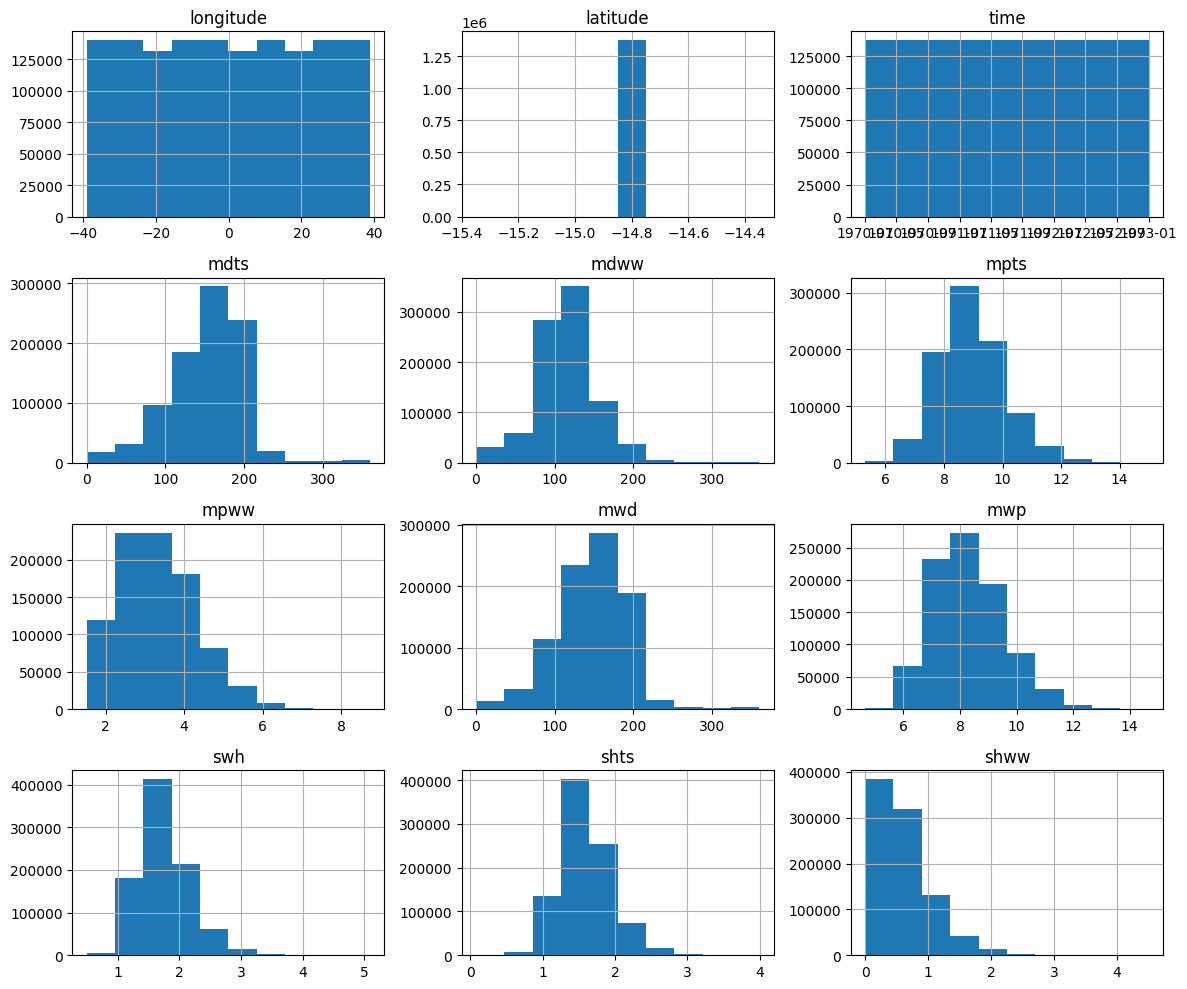

In [ ]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


In [ ]:
variavel = 'mwd'  # Substitua pelo nome da variável que você deseja visualizar
df.set_index('time').groupby('expver')[variavel].plot(legend=True)
plt.ylabel(variavel)
plt.show()


In [ ]:
df

,longitude,latitude,time,mdts,mdww,mpts,mpww,mwd,mwp,swh,shts,shww
0,-39.07,-14.85,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-39.07,-14.85,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-39.07,-14.85,1970-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-39.07,-14.85,1970-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-39.07,-14.85,1970-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1376571,38.93,-14.85,1972-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1376572,38.93,-14.85,1972-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1376573,38.93,-14.85,1972-12-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1376574,38.93,-14.85,1972-12-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = df.dropna()

In [ ]:
df2

,longitude,latitude,time,mdts,mdww,mpts,mpww,mwd,mwp,swh,shts,shww
8768,-38.57,-14.85,1970-01-01 00:00:00,108.731323,102.532547,6.332682,3.020192,107.155579,5.708669,1.054155,0.941763,0.449391
8769,-38.57,-14.85,1970-01-01 03:00:00,107.594215,94.919113,6.043980,2.915158,106.886406,5.682813,1.102807,1.038016,0.348594
8770,-38.57,-14.85,1970-01-01 06:00:00,107.824936,102.982986,6.035106,2.403306,107.847733,5.909398,1.094230,1.074963,0.182754
8771,-38.57,-14.85,1970-01-01 09:00:00,108.725830,107.388451,6.268937,2.767624,109.012306,6.026746,1.099221,1.060136,0.265674
8772,-38.57,-14.85,1970-01-01 12:00:00,108.764282,126.581352,6.431776,2.786121,110.407608,6.013129,1.123477,1.052245,0.380222
...,...,...,...,...,...,...,...,...,...,...,...,...
903099,11.93,-14.85,1972-12-31 09:00:00,213.564789,253.625824,10.123530,1.950687,213.610062,10.097328,1.506299,1.504276,0.068344
903100,11.93,-14.85,1972-12-31 12:00:00,212.433182,232.263153,10.410311,2.816509,213.769363,9.920160,1.520360,1.473906,0.362964
903101,11.93,-14.85,1972-12-31 15:00:00,212.488113,225.918610,10.491361,3.349280,214.708710,9.254173,1.594393,1.449812,0.651947
903102,11.93,-14.85,1972-12-31 18:00:00,214.130600,206.083023,9.882304,3.345646,213.269470,8.881631,1.653592,1.507564,0.657104


In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['time', 'mpts', None], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['time', 'shts', None], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['time', 'mwp', None], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df2, *['time', 'mwd', None], **{})
chart

In [ ]:
df3

,longitude,latitude,time,mdts,mdww,mpts,mpww,mwd,mwp,swh,shts,shww
0,-39.07,-14.85,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-39.07,-14.85,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-39.07,-14.85,1970-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-39.07,-14.85,1970-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-39.07,-14.85,1970-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8763,-39.07,-14.85,1972-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8764,-39.07,-14.85,1972-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8765,-39.07,-14.85,1972-12-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8766,-39.07,-14.85,1972-12-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df4 = df3.dropna()

In [ ]:
df4

,longitude,latitude,time,mdts,mdww,mpts,mpww,mwd,mwp,swh,shts,shww
